In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import time
import datetime as dt
matplotlib.style.use('ggplot')

# Loading dataset
Loading dataset from file provided

In [0]:
data = pd.read_csv('/content/BearingVibration_Dataset.csv')

In [0]:
# Change time datatype from string to datetime object
tanggal = [time.strptime(i, '%Y-%m-%d %H:%M:%S') for i in data['Unnamed: 0']]
tgl = np.array([], dtype='object')

for i in tanggal:
    y,m,d,h,mi,s = i.tm_year, i.tm_mon, i.tm_mday, i.tm_hour, i.tm_min, i.tm_sec
    tgl = np.append(tgl, dt.datetime(y,m,d,h,mi,s))

The RAW data of sensor provided is shown in figure below

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


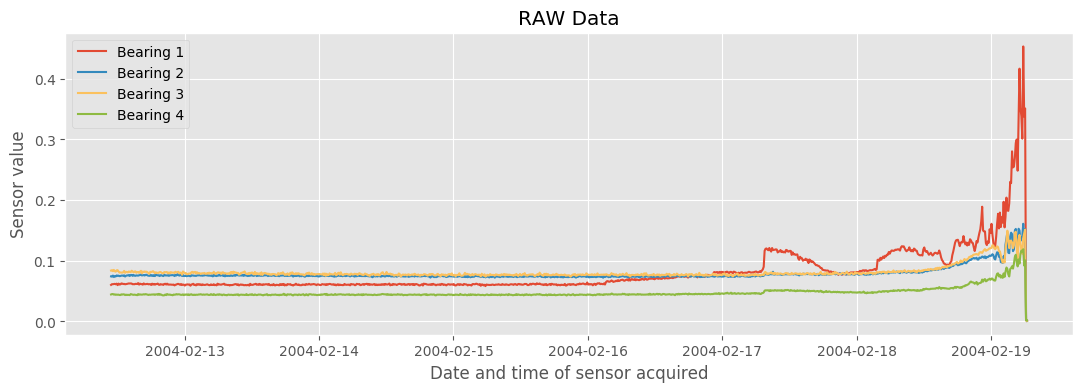

In [4]:
# Plotting RAW data into 
plt.figure(figsize=(13,4), dpi=100)
plt.plot(tgl, data['Bearing 1'], label='Bearing 1', color='C0')
plt.plot(tgl, data['Bearing 2'], label='Bearing 2', color='C1')
plt.plot(tgl, data['Bearing 3'], label='Bearing 3', color='C4')
plt.plot(tgl, data['Bearing 4'], label='Bearing 4', color='C5')
plt.legend()
plt.title('RAW Data')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sensor value')
plt.show()

## Data Processing 
In my analysis, the data above is the vibration of the machine. The machine itself has its vibration but not too much. If it get too much vibration it means the machine is in anomaly or even going to be broken. To detect the vibration itself I calculate the standard deviation of the signal in a window of time. The higher the vibration, it makes the standard deviation higher.

I process the RAW data above to get the moving average and standard deviation with 50 window data, and show it into graph to analyze the where is the anomaly of the machine. I choose the window with 50 data because the data obtained in 1 day is about 100 data, and to minimize the false positive detection of spike signal.

In [0]:
# Processing data 'Bearing 1'
bear1 = data['Bearing 1']

mean1, std1 = [np.array([]), np.array([])]

anomaly1 = np.array([])
window = 50
for i in range(len(bear1)):
    rt = np.mean(bear1[max(0,i-window):min(len(bear1),i+0*window//2)])
    std = np.std(bear1[max(0,i-window):min(len(bear1),i+0*window//2)])
    mean1 = np.append(mean1, rt)
    std1 = np.append(std1, std)
    if std > 0.005: anomaly1 = np.append(anomaly1, 0.3)
    elif std > 0.003: anomaly1 = np.append(anomaly1, 0.2)
    elif std > 0.0015: anomaly1 = np.append(anomaly1, 0.1)
    else: anomaly1 = np.append(anomaly1, 0)

In [0]:
# Processing data 'Bearing 2'
bear2 = data['Bearing 2']

mean2, std2 = [np.array([]), np.array([])]

anomaly2 = np.array([])
for i in range(len(bear2)):
    rt = np.mean(bear2[max(0,i-window):min(len(bear2),i+0*window//2)])
    std = np.std(bear2[max(0,i-window):min(len(bear2),i+0*window//2)])
    mean2 = np.append(mean2, rt)
    std2 = np.append(std2, std)
    if std > 0.005: anomaly2 = np.append(anomaly2, 0.3)
    elif std > 0.003: anomaly2 = np.append(anomaly2, 0.2)
    elif std > 0.0015: anomaly2 = np.append(anomaly2, 0.1)
    else: anomaly2 = np.append(anomaly2, 0)

In [0]:
# Processing data 'Bearing 3'
bear3 = data['Bearing 3']

mean3, std3 = [np.array([]), np.array([])]

anomaly3 = np.array([])
for i in range(len(bear3)):
    rt = np.mean(bear3[max(0,i-window):min(len(bear3),i+0*window//2)])
    std = np.std(bear3[max(0,i-window):min(len(bear3),i+0*window//2)])
    mean3 = np.append(mean3, rt)
    std3 = np.append(std3, std)
    if std > 0.005: anomaly3 = np.append(anomaly3, 0.3)
    elif std > 0.003: anomaly3 = np.append(anomaly3, 0.2)
    elif std > 0.0015: anomaly3 = np.append(anomaly3, 0.1)
    else: anomaly3 = np.append(anomaly3, 0)

In [0]:
# Processing data 'Bearing 4'
bear4 = data['Bearing 4']

mean4, std4 = [np.array([]), np.array([])]

anomaly4 = np.array([])
for i in range(len(bear4)):
    rt = np.mean(bear4[max(0,i-window):min(len(bear4),i+0*window//2)])
    std = np.std(bear4[max(0,i-window):min(len(bear4),i+0*window//2)])
    mean4 = np.append(mean4, rt)
    std4 = np.append(std4, std)
    if std > 0.005: anomaly4 = np.append(anomaly4, 0.3)
    elif std > 0.003: anomaly4 = np.append(anomaly4, 0.2)
    elif std > 0.0015: anomaly4 = np.append(anomaly4, 0.1)
    else: anomaly4 = np.append(anomaly4, 0)

sumofdata = bear1 + bear2 + bear3 + bear4
sumofstd = std1 + std2 + std3 + std4

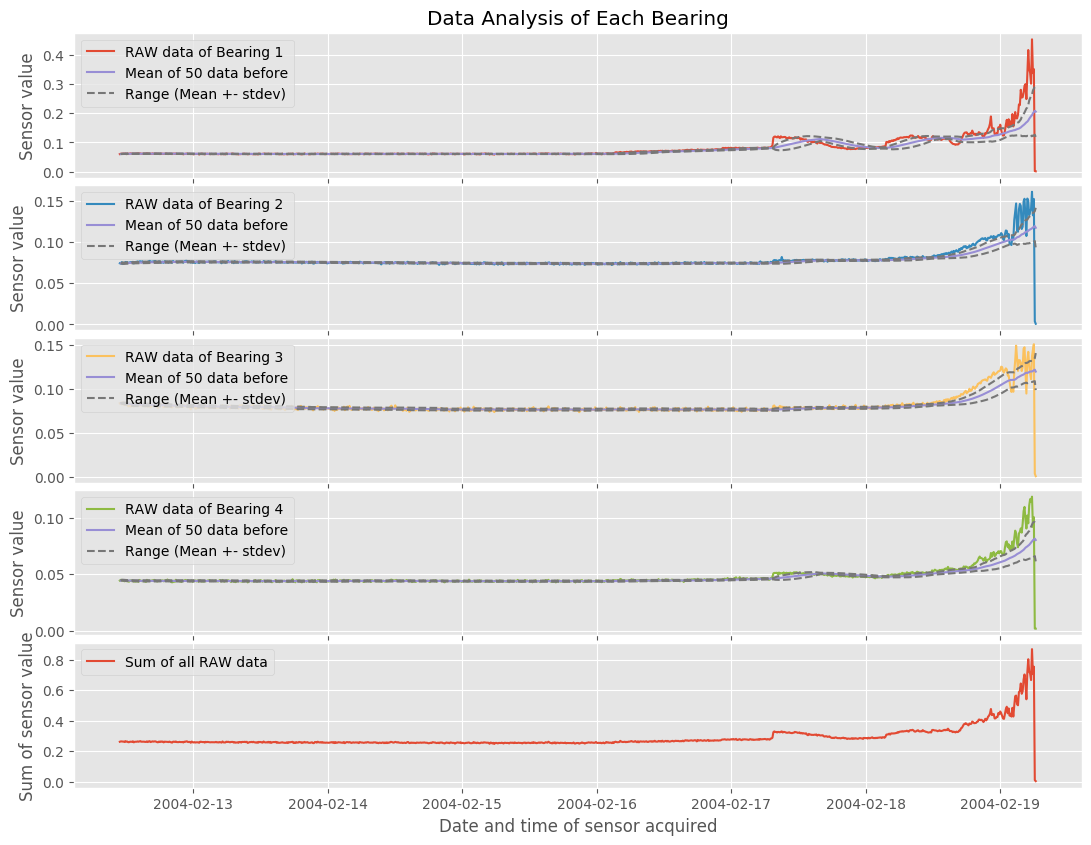

In [9]:
plt.figure(figsize=(13,10), dpi=100)

plt.subplot(511)
plt.plot(tgl, data['Bearing 1'], color='C0', label='RAW data of Bearing 1')
plt.plot(tgl, mean1, color='C2', label=f'Mean of {window} data before')
plt.plot(tgl, mean1 + std1, color='C3', linestyle='--', label='Range (Mean +- stdev)')
plt.plot(tgl, mean1 - std1, color='C3', linestyle='--')
plt.legend(loc='upper left')
plt.title('Data Analysis of Each Bearing')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sensor value')

plt.subplot(512)
plt.plot(tgl, data['Bearing 2'], color='C1', label='RAW data of Bearing 2')
plt.plot(tgl, mean2, color='C2', label=f'Mean of {window} data before')
plt.plot(tgl, mean2 + std2, color='C3', linestyle='--', label='Range (Mean +- stdev)')
plt.plot(tgl, mean2 - std2, color='C3', linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sensor value')

plt.subplot(513)
plt.plot(tgl, data['Bearing 3'], color='C4', label='RAW data of Bearing 3')
plt.plot(tgl, mean3, color='C2', label=f'Mean of {window} data before')
plt.plot(tgl, mean3 + std3, color='C3', linestyle='--', label='Range (Mean +- stdev)')
plt.plot(tgl, mean3 - std3, color='C3', linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sensor value')

plt.subplot(514)
plt.plot(tgl, data['Bearing 4'], color='C5', label='RAW data of Bearing 4')
plt.plot(tgl, mean4, color='C2', label=f'Mean of {window} data before')
plt.plot(tgl, mean4 + std4, color='C3', linestyle='--', label='Range (Mean +- stdev)')
plt.plot(tgl, mean4 - std4, color='C3', linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sensor value')

plt.subplot(515)
plt.plot(tgl, sumofdata, color='C7', label='Sum of all RAW data')
plt.legend(loc='upper left')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sum of sensor value')

plt.subplots_adjust(hspace=.05)
plt.show()

## My data analysis
From the previous plot, I decided the machine grade in 4 different states. the first is the machine is healthy, anomaly, damage, and broken, and stopped working.
* Healthy is the machine in normal vibration, where the sum of all bearing standard deviations (stdev) under 0.004.
* Anomaly is where the total stdev is 0.004 to 0.008.
* Damage is where the total stev is 0.008 to 0.03.
* Broken is where the total stdev is more than 0.03.

In [10]:
bear1.iloc[-1]

0.001168367596073911

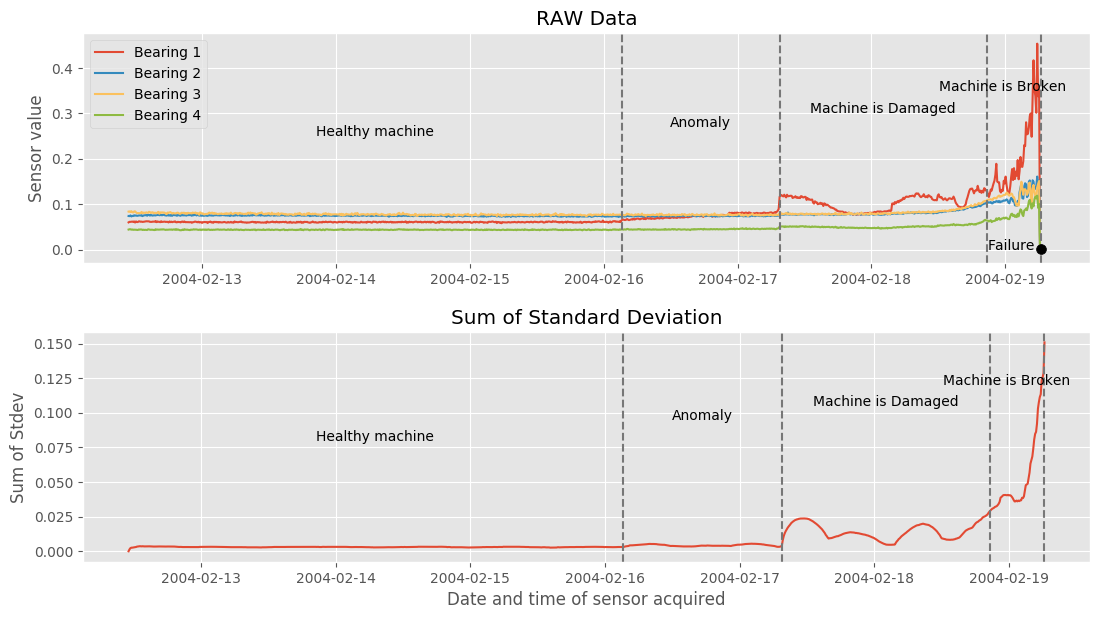

In [11]:
# Plotting RAW data into 
plt.figure(figsize=(13,7), dpi=100)
plt.subplot(211)
plt.plot(tgl, data['Bearing 1'], label='Bearing 1', color='C0')
plt.plot(tgl, data['Bearing 2'], label='Bearing 2', color='C1')
plt.plot(tgl, data['Bearing 3'], label='Bearing 3', color='C4')
plt.plot(tgl, data['Bearing 4'], label='Bearing 4', color='C5')
plt.scatter(tgl[-1], data['Bearing 1'].iloc[-1], color='black', s=50, zorder=10)
plt.axvline(tgl[530], color='C3', linestyle='--')
plt.axvline(tgl[700], color='C3', linestyle='--')
plt.axvline(tgl[923], color='C3', linestyle='--')
plt.axvline(tgl[-1], color='C3', linestyle='--')

plt.text(tgl[265], 0.25, 'Healthy machine', horizontalalignment='center')
plt.text(tgl[615], 0.27, 'Anomaly', horizontalalignment='center')
plt.text(tgl[811], 0.30, 'Machine is Damaged', horizontalalignment='center')
plt.text(tgl[940], 0.35, 'Machine is Broken', horizontalalignment='center')
plt.text(tgl[975], 0, 'Failure', horizontalalignment='right')

plt.legend()
plt.title('RAW Data')
plt.ylabel('Sensor value')


plt.subplot(212)
plt.plot(tgl, sumofstd)
plt.axvline(tgl[530], color='C3', linestyle='--')
plt.axvline(tgl[700], color='C3', linestyle='--')
plt.axvline(tgl[923], color='C3', linestyle='--')
plt.axvline(tgl[-1], color='C3', linestyle='--')

plt.text(tgl[265], 0.08, 'Healthy machine', horizontalalignment='center')
plt.text(tgl[615], 0.095, 'Anomaly', horizontalalignment='center')
plt.text(tgl[811], 0.105, 'Machine is Damaged', horizontalalignment='center')
plt.text(tgl[940], 0.12, 'Machine is Broken', horizontalalignment='center')

plt.title('Sum of Standard Deviation')
plt.xlabel('Date and time of sensor acquired')
plt.ylabel('Sum of Stdev')

plt.subplots_adjust(hspace=0.3)
plt.show()

# Automatic alarm
In this section I provide the automatic system that can send the alarm signal to the user. The alarm signal in 3 different states. State 1 is when the machine is in anomaly, state 2 when the machine in damage, then state 3 is when the machine is broken.

In [0]:
a1, alarm1 = np.array([]), np.array([0])
a2, alarm2 = np.array([]), np.array([0])
a3, alarm3 = np.array([]), np.array([0])

for s in sumofstd:
    a3 = np.append(a3, s>0.03)
    a2 = np.append(a2, s>0.008)
    a1 = np.append(a1, s>0.005)

wind = 50
for e in range(1,len(a1)):
    alarm1 = np.append(alarm1, np.max(a1[max(0,e-wind):e]))
    alarm2 = np.append(alarm2, np.max(a2[max(0,e-wind):e]))
    alarm3 = np.append(alarm3, np.max(a3[max(0,e-wind):e]))

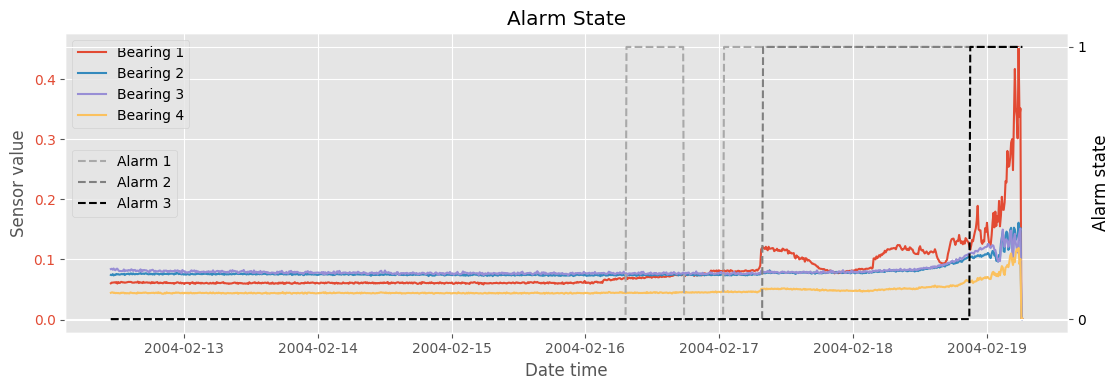

In [13]:
fig, ax1 = plt.subplots()
fig.set_dpi(100)
fig.set_size_inches(11.3,4)

color = 'C0'
ax1.set_xlabel('Date time')
ax1.set_ylabel('Sensor value')
ax1.plot(tgl, data['Bearing 1'], color='C0', label='Bearing 1')
ax1.plot(tgl, data['Bearing 2'], color='C1', label='Bearing 2')
ax1.plot(tgl, data['Bearing 3'], color='C2', label='Bearing 3')
ax1.plot(tgl, data['Bearing 4'], color='C4', label='Bearing 4')
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Alarm state', color=color)  # we already handled the x-label with ax1
ax2.plot(tgl, alarm1, color='darkgrey', linestyle='--', label='Alarm 1')
ax2.plot(tgl, alarm2, color='grey', linestyle='--', label='Alarm 2')
ax2.plot(tgl, alarm3, color='black', linestyle='--', label='Alarm 3')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='center left')
ax2.set_yticks([0,1])
ax1.set_title('Alarm State')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()